In [2]:
R = PolynomialRing(QQ, 'x')

In [12]:
def plotPoly(polys, name, L, R):
    x = var('x')
    a = plot([],figsize=(8, 8),title=name)
    classic_colors = ['crimson', 'blue', 'green', 'orange', 'purple', 'brown', 'red', 'yellow']
    n = len(polys)
    assert(n > 0)
    assert(len(L) == n and len(R) == n)
    for i in range(n):
        a += plot(polys[i], x, L[i], R[i], color=colors.keys()[i])
    show(a)

In [4]:
def Lagrange(points):
    #x = R.0
    n = len(points)
    assert(n > 1)
    ans = 0
    for i in range(n):
        act = points[i][1]
        for j in range(n):
            if i == j: continue
            act *= (x - points[j][0]) / (points[i][0] - points[j][0])
        ans += act
    return ans

In [5]:
def Newton(points):
    #x = R.0
    n = len(points)
    assert(n > 1)
    memo = matrix(QQ, n, n, 0)
    for i in range(n):
        memo[i, 0] = points[i][1]
    for l in range(1, n):
        for i in range(0, n - l):
            memo[i, l] = (memo[i+1][l-1] - memo[i][l-1]) / (points[i+l][0] - points[i][0])
    ans = 0
    prefix = 1
    for i in range(n):
        ans += prefix * memo[0][i]
        if i + 1 < n: prefix *= (x - points[i][0])   
    return ans

In [6]:
def parsePoly(poly):
    var('x')
    ans = 0
    mono = 1;
    for i in range(len(poly.list())):
        ans += poly.list()[i] * mono
        mono *= x
    return ans

# Tabla 1

In [7]:
points = [(-7, 1), (-6, -2), (-4, -5), (-3.5, -9)]

In [8]:
L = parsePoly(Lagrange(points))
print(L)

-0.885714285714285*x^3 - 14.5571428571429*x^2 - 79.7571428571428*x - 147.800000000000


In [9]:
N = parsePoly(Newton(points))
print(N)

-196982840844438/222399981598559*x^3 - 6475016607112333/444799963197118*x^2 - 754807961863073/9463829004194*x - 32870717280267025/222399981598559


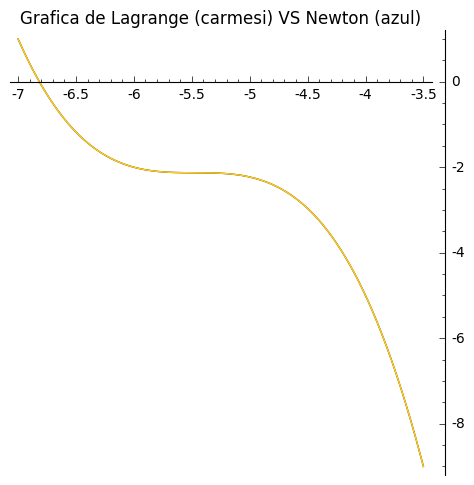

In [10]:
plotPoly([L, N], "Grafica de Lagrange (carmesi) VS Newton (azul)", [-7, -7], [-3.5, -3.5])

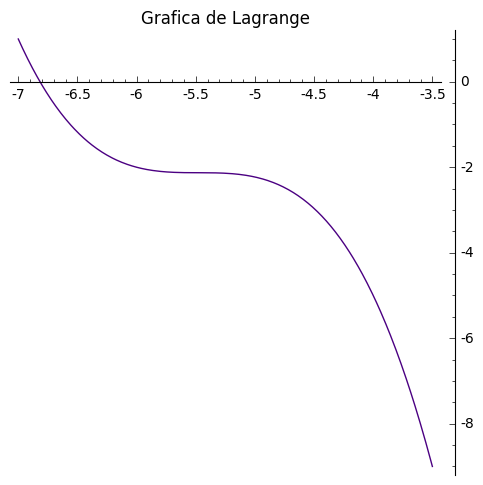

In [11]:
plotPoly([L], "Grafica de Lagrange", [-7], [-3.5])

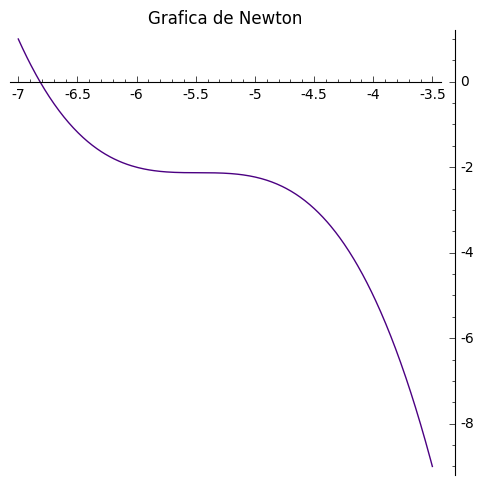

In [12]:
plotPoly([N], "Grafica de Newton", [-7], [-3.5])

# Tabla 2

In [13]:
points2 = [(-3.5, -9), (-1.5, -9)]

In [14]:
L2 = parsePoly(Lagrange(points2))
print(L2)

-9.00000000000000


In [15]:
N2 = parsePoly(Newton(points2))
print(N2)

-9


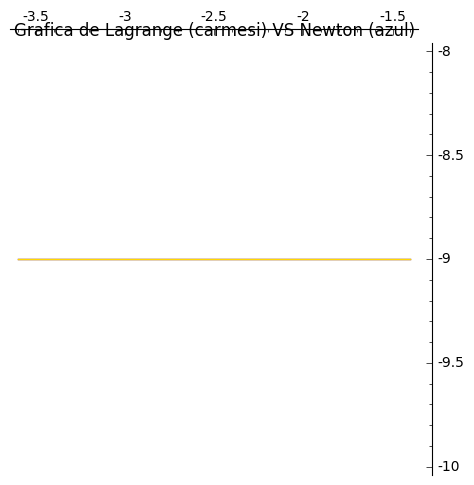

In [16]:
plotPoly([L2, N2], "Grafica de Lagrange (carmesi) VS Newton (azul)", [-3.6, -3.6], [-1.4, -1.4])

# Tabla 3

In [17]:
points3 = [(-1.5, -9), (-1, -5), (-0.5, -3), (0, 0)]

In [18]:
L3 = parsePoly(Lagrange(points3))
print(L3)

4.00000000000000*x^3 + 8.00000000000000*x^2 + 9.00000000000000*x


In [19]:
N3 = parsePoly(Newton(points3))
print(N3)

4*x^3 + 8.00000000000000*x^2 + 9.00000000000000*x


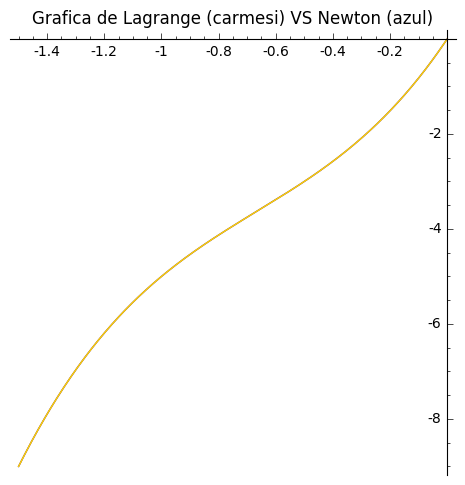

In [20]:
plotPoly([L3, N3], "Grafica de Lagrange (carmesi) VS Newton (azul)", [-1.5, -1.5], [0, 0])

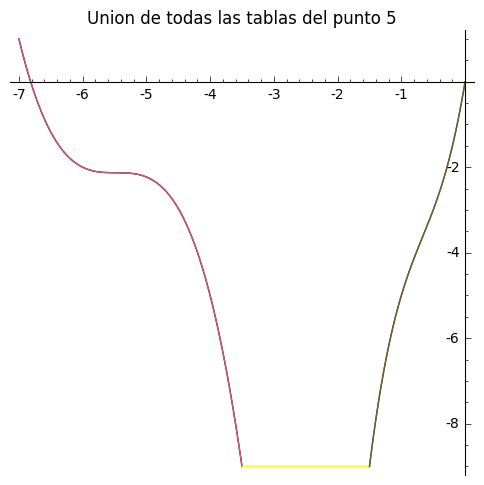

In [21]:
plotPoly([L, L2, L3, N, N2, N3], "Union de todas las tablas del punto 5", [-7, -3.5, -1.5, -7, -3.5, -1.5], [-3.5, -1.5, 0, -3.5, -1.5, 0])

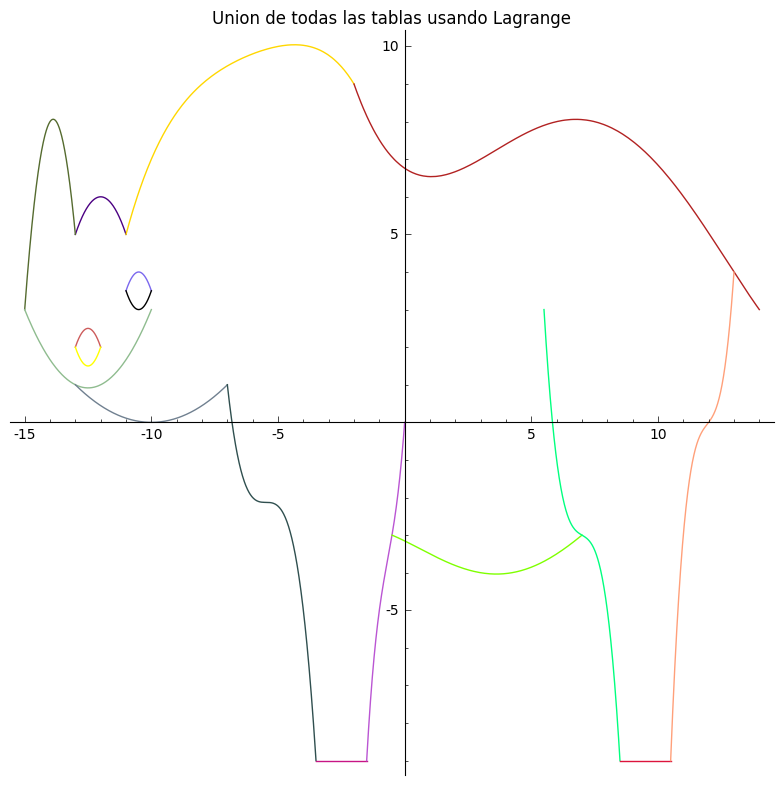

In [14]:
# Solucion de todas las tablas


groups = [ [(-13, 5), (-12, 6), (-11, 5)], [(-11, 5), (-10, 7), (-8, 9), (-5, 10), (-2, 9)], [(-2, 9), (3, 7), (6, 8), (13, 4), (14, 3)], [(-13, 2), (-12.5, 2.5), (-12, 2)], [(-13, 2), (-12.5, 1.5), (-12, 2)], [(-15, 3), (-14, 8), (-13, 5)], [(-15, 3), (-13, 1), (-12, 1), (-10, 3)], [(-13, 1), (-10, 0), (-7, 1)], [(-7, 1), (-6, -2), (-4, -5), (-3.5, -9)], [(-3.5, -9), (-1.5, -9)], [(-1.5, -9), (-1, -5), (-0.5, -3), (0, 0)], [(-0.5, -3), (1, -3.5), (3, -4), (6, -3.5), (7, -3)], [(-11, 3.5), (-10.5, 4), (-10, 3.5)], [(-11, 3.5), (-10.5, 3), (-10, 3.5)], [(5.5, 3), (7, -3), (8, -5), (8.5, -9)], [(8.5, -9), (10.5, -9)], [(10.5, -9), (11, -3), (12, 0), (13, 4)] ]

polynomials = []
L = []
R = []

for points in groups:
    p = parsePoly(Lagrange(points))
    polynomials.append(p)
    minimum = points[0][0]
    maximum = points[0][0]
    for i in range(1, len(points)):
        if points[i][0] < minimum: minimum = points[i][0]
        if points[i][0] > maximum: maximum = points[i][0]
    L.append(minimum)
    R.append(maximum)
plotPoly(polynomials, "Union de todas las tablas usando Lagrange", L, R)

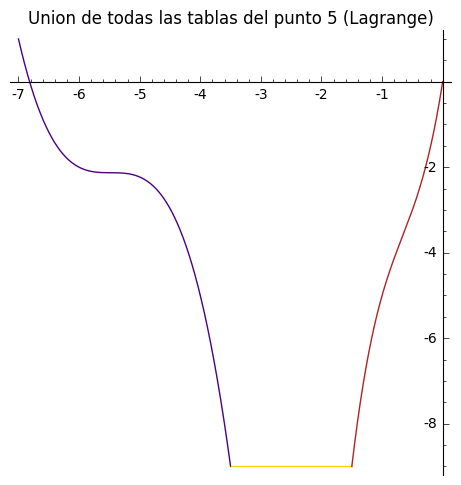

In [23]:
plotPoly([L, L2, L3], "Union de todas las tablas del punto 5 (Lagrange)", [-7, -3.5, -1.5], [-3.5, -1.5, 0])

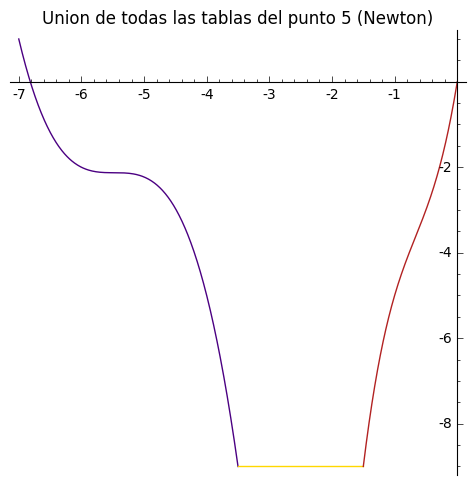

In [24]:
plotPoly([N, N2, N3], "Union de todas las tablas del punto 5 (Newton)", [-7, -3.5, -1.5], [-3.5, -1.5, 0])

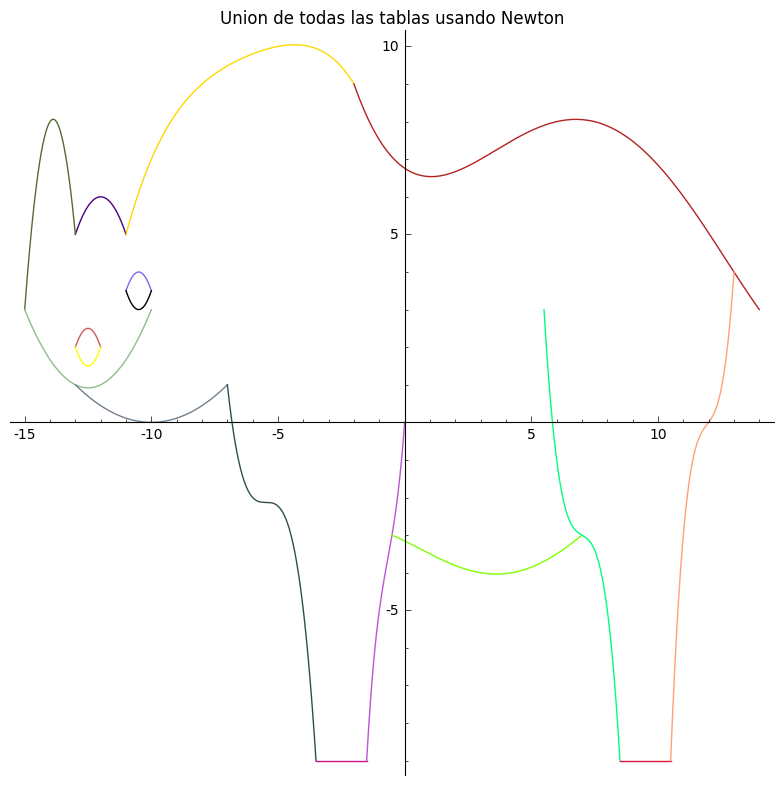

In [15]:
# Solucion de todas las tablas


groups = [ [(-13, 5), (-12, 6), (-11, 5)], [(-11, 5), (-10, 7), (-8, 9), (-5, 10), (-2, 9)], [(-2, 9), (3, 7), (6, 8), (13, 4), (14, 3)], [(-13, 2), (-12.5, 2.5), (-12, 2)], [(-13, 2), (-12.5, 1.5), (-12, 2)], [(-15, 3), (-14, 8), (-13, 5)], [(-15, 3), (-13, 1), (-12, 1), (-10, 3)], [(-13, 1), (-10, 0), (-7, 1)], [(-7, 1), (-6, -2), (-4, -5), (-3.5, -9)], [(-3.5, -9), (-1.5, -9)], [(-1.5, -9), (-1, -5), (-0.5, -3), (0, 0)], [(-0.5, -3), (1, -3.5), (3, -4), (6, -3.5), (7, -3)], [(-11, 3.5), (-10.5, 4), (-10, 3.5)], [(-11, 3.5), (-10.5, 3), (-10, 3.5)], [(5.5, 3), (7, -3), (8, -5), (8.5, -9)], [(8.5, -9), (10.5, -9)], [(10.5, -9), (11, -3), (12, 0), (13, 4)] ]

polynomials = []
L = []
R = []

for points in groups:
    p = parsePoly(Newton(points))
    polynomials.append(p)
    minimum = points[0][0]
    maximum = points[0][0]
    for i in range(1, len(points)):
        if points[i][0] < minimum: minimum = points[i][0]
        if points[i][0] > maximum: maximum = points[i][0]
    L.append(minimum)
    R.append(maximum)
plotPoly(polynomials, "Union de todas las tablas usando Newton", L, R)